In [7]:
from matplotlib import pyplot as plt
% matplotlib inline

# BLU2 - Learning Notebook - Part 1 of 3 - Time series modelling concepts

In BLU1, you were taught on how to explore time series datasets. With the multi-index, rolling windows and resampling methods we've shown you, there is already a lot of questions about historical data you can answer. But what about predicting the future values for stock markets, electricity demand, pollution levels, etc? To do that, we need to enter into the realm of **forecasting**. To achieve this, we can use simple approachs based on rolling windows or time series modelling. But, before entering that realm, we need to list some common definitions that you will find throughout literature.

## Basic modelling concepts

Throughout time series literature, you will find several terms like **trend**, **seasonal**, **exogenous variable**, etc. These terms are used to refer to specific components of a time series and what (external) phenomena might be connected to the what you are trying to predict. Let's start with the components and, after that, the nomenclature for variables.

## 1. Components

Time series can be thought as a (linear or non-linear) composition of 4 components: **trend**, **cyclical**, **seasonal** and **irregular**

$$Y_t = Trend + Cyclical + Seasonal + Irregular$$

Or

$$Y_t = Trend \cdot Cyclical \cdot Seasonal \cdot Irregular$$

Or another non-linear combination of all four. Each one of the previous four components is also time series.

### 1.1. Trend

The trend is the component of the time series that allows us to see if, in general, the dependent variable we are observing is increasing, without taking into consideration local flutuations. Usually, people look at the trend to see if the mean value of a series is (monotonically) increasing or decreasing. The trend can be modelled as a linear or non-linear process, even though people prefer to assume it is linear.

In order to understand the concept of trend, let's look at a small dataset with [monthly shampoo sales for a shampoo company over a 3 year period](https://datamarket.com/data/set/22r0/sales-of-shampoo-over-a-three-year-period)

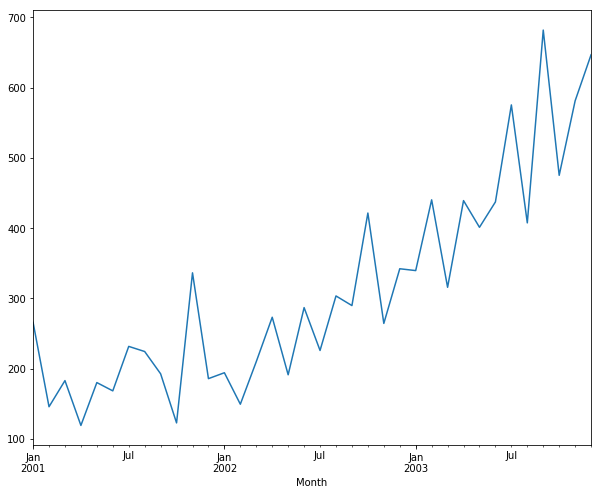

In [8]:
from utils import load_shampoo_series

shampoo_sales = load_shampoo_series()

shampoo_sales.plot(figsize=(10, 8));

The first thing you probably notice is that, in general, the *sales are increasing* even though that are anual peaks. In order to visualize the trend, let's plot a simple linear regression that maps the time and the sales

This trend tells us that, between any two consecutive months, the overall sales increase by 12.079073359073359.


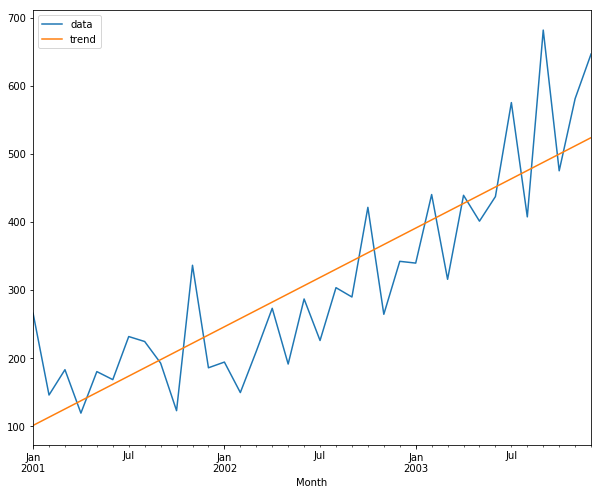

In [9]:
from utils import show_shampoo_sales_and_trend

coef = show_shampoo_sales_and_trend(figsize=(10, 8))

print("This trend tells us that, between any two consecutive months, the overall sales increase by {}.".format(coef))

Having a non-zero trend like the one we got in here is not a good thing when using certain models. We will learn more about it in the next notebooks.

### 1.2. Cyclical

The cyclical component is, as the name states, a time series that exhibits a behavior that repeats in non-regular time intervals. For example, the performance of the world economy in the 20st century would exhibit a strong cyclical component with non-regular cycles (remember the crisis at the 80's and 2007).

### 1.3. Seasonal

Unlike the cyclical component, the seasonal component changes at a fixed rate. For example, the bookings in hotels in certain cities have well known maxima (Autumn) and minima (Summer). Another clear example of seasonality is the one we have in a famous dataset that shows the [number of passengers for an international airline company](https://datamarket.com/data/set/22u3/international-airline-passengers-monthly-totals-in-thousands-jan-49-dec-60#!ds=22u3&display=line), spanning from 1949 to 1961

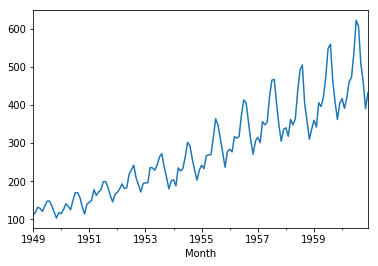

In [10]:
from utils import load_airlines_series

airlines = load_airlines_series()

airlines.plot()

In this time series, we can see, at least, two things: (1) a positive trend and (2) yearly minima and maxima approximately in the same months. To make (2) more clear, let's plot the time series for each year

In [11]:
from utils import plot_seasonality_for_airlines

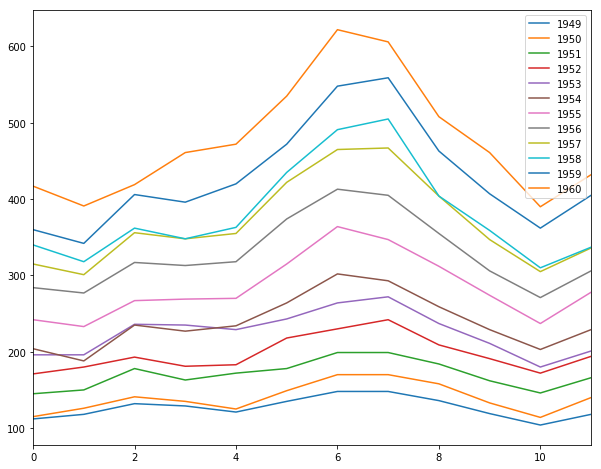

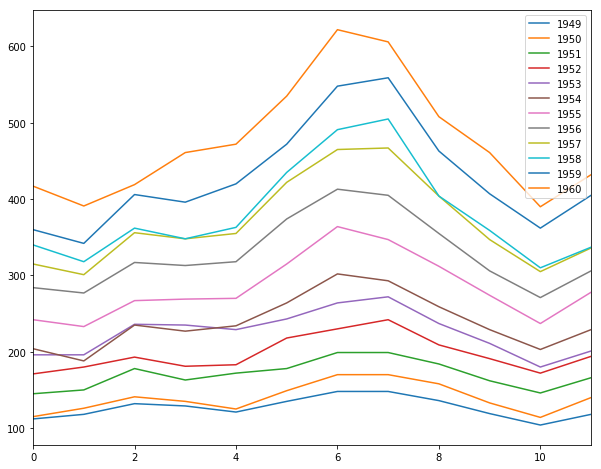

In [12]:
plot_seasonality_for_airlines(normalize=False)

Around June-July, we get the peak and around October, we get the period with less passengers. In order for this pattern to be clear for you, let's normalize the season time series for each year

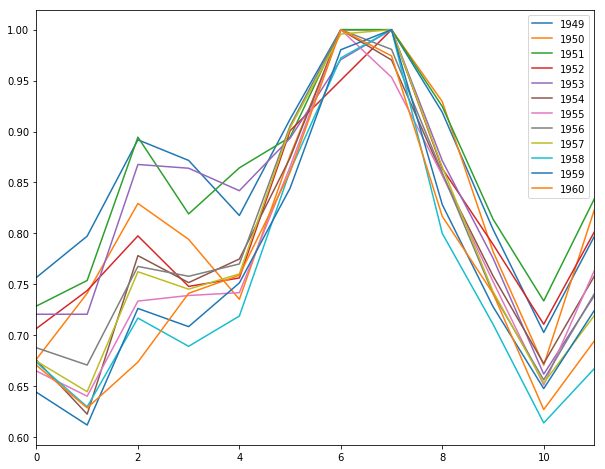

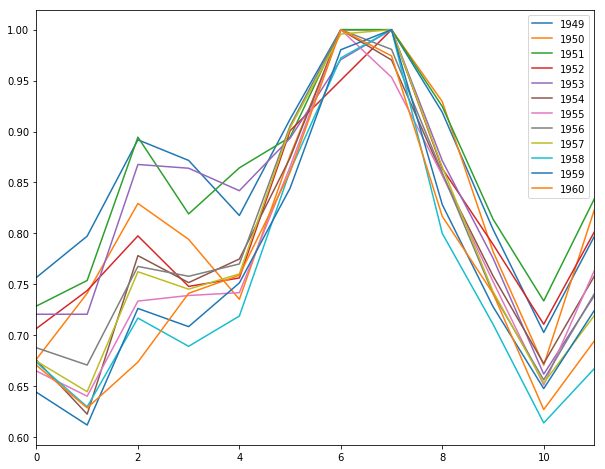

In [13]:
plot_seasonality_for_airlines(normalize=True)

from the normalized plot, we can see a clear pattern in the second half of each year but we get a more dubious pattern for the first half.

### 1.4. Irregular

After accounting for all the previous components, the remaining component, called *irregular* or *residual*, won't have any pattern. This part of the time series is considered noise. You might be thinking that this component is useless. But, in fact, several modelling techniques analyze this component in order to check a better model can be created.

### 1.5. Example

After introducing all 4 components, let's look into more examples

![four example time series](images/ts-examples.png "")

The upper left time series shows both a seasonal component for each year and a strong cyclical component that takes 6-10 years (imagine an ark connecting 1975 to 1981 and another one connecting 1981 and 1991) but no apparent trend.

In the upper right corner, we have a strong negative trend but no visible seasonal nor cyclical behavior. This might be due to how small the time series was. 

In the lower left corner, shows both strong (positive trend) and seasonality but no cyclical component.

Finally, the time series at the lower right corner looks like pure noise, with some peaks. No clear pattern.


You might be asking "Are there any tools to help me identify all 4 components? After identifying them, what can I do with them?". The answers to these questions are in the next notebooks. ;)

-------------

## Variable types



When talking about modelling (in general) and some statistical tests, we hear a lot about terms like independent and dependent variables. In simple terms, independent variables are the ones you have been using as inputs for your models (the classifiers at the hackathon 1) and the dependent variable is the target you want to predict (at the hackathon, it was a yes/no for "Is it going to rain tomorrow?"). Your model will act as a map between the dependent and independent variables.

In time series, the terms used for your features/variables are a bit different and those differences actually matter. Let's look into them.

### Endogenous Variable

From [Merriam Webster](https://www.merriam-webster.com/dictionary/endogenous), *2.a : caused by factors inside the organism or system*. In other words, an endogenous variable is a variable whose value is determined by the model you are using to predict a time series. It is like a feedback loop: your model will you values that it produced in previous predictions. It is an input signal that comes from the model that produces that same signal. When you use this type of variables, you are assuming that the next values of a time series will depend on previous values of that same time series.

### Exogenous Variable

From [Merriam Webster](https://www.merriam-webster.com/dictionary/exogenous), *introduced from or produced outside the organism or system; specifically : not synthesized within the organism or system*. These are variables/features that aren't predicted by the model you build nor is it affected by predictions your model makes. This type of feature is believed to have an impact on what you want to predict but, no matter what the prediction you make, the exogenous variable won't be affected.

You might be wondering "Aren't those endogenous equal to dependent variables and exogenous equal to independent variables?". The answer is **no**. Let me give you an example to show you the difference: imagine you have a model that predicts the price of a product based on (1) demand and (2) past price values. You might be tempted to think that (1) is exogenous and (2) is endogenous. But economists know that if you lower the price of a good, people will be more open to acquire more of it. And, as such, the demand is not independent the predictions your model does, even more if you use those predictions to set the price. You can still use the demand as an exogenous variable but you will break the assumption of independence between the prediction and the exogenous variable. If you do that, don't tell us that you weren't warned about it.

Another example: when predicting the stock value for a specific company, the stock values of previous days are the **endogenous variables** while descriptors like the number of employees, number of products, number of clients are the **exogenous variables**.